In [1]:
import torch
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler, UNet2DConditionModel
from transformers import CLIPTextModel, CLIPTokenizer

# repo = "Bingsu/my-korean-stable-diffusion-v1-5"
# euler_ancestral_scheduler = EulerAncestralDiscreteScheduler.from_config(repo, subfolder="scheduler")
# ko_pipe = StableDiffusionPipeline.from_pretrained(
#     repo, scheduler=euler_ancestral_scheduler, torch_dtype=torch.float16,
# )
# ko_pipe.to(device)

In [2]:
device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)

In [13]:
source_text_encoder_id = "Bingsu/my-korean-stable-diffusion-v1-5"
# source_"Bingsu/my-korean-stable-diffusion-v1-5"
model_path = "/Jupyter/models/sd-foodai-model-rxt4090"
torch_dtype=torch.bfloat16
initial_model_dir = '/Jupyter/models/initial-ai-menu-stable-diffusion-v1-4'

In [4]:
text_encoder = CLIPTextModel.from_pretrained(source_text_encoder_id,
                              subfolder="text_encoder",
                            torch_dtype=torch_dtype
                             )

In [5]:
tokenizer = CLIPTokenizer.from_pretrained(
    source_text_encoder_id,
    subfolder="tokenizer",
)

In [6]:
unet = UNet2DConditionModel.from_pretrained(model_path + "/checkpoint-90000/unet", torch_dtype=torch_dtype)

In [8]:
pipeline = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    text_encoder=text_encoder,
    unet=unet,
    tokenizer=tokenizer,
    torch_dtype=torch_dtype
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [10]:
pipeline.to(device)

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.29.2",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [26]:
prompt='아이스 아메리카노 한잔과 와인 한잔'

  0%|          | 0/35 [00:00<?, ?it/s]

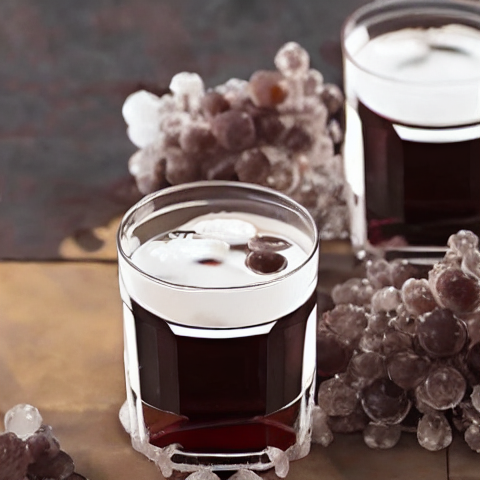

In [27]:
generator = torch.Generator(device=device).manual_seed(42)
pipeline(prompt=prompt,
    # negative_prompt="chinese food", # Negative prompt to avoid
    height=480, width=480,     # Specify the image size
    guidance_scale=8,          # How strongly to follow the prompt
    num_inference_steps=35,    # How many steps to take
    generator=generator,        # Fixed random seed
    ).images[0]

In [14]:
pipeline.save_pretrained(initial_model_dir)

[2024-07-11 08:47:23,498] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 [WARNING]  Please specify the CUTLASS repo directory as environment variable $CUTLASS_PATH
 [WARNING]  sparse_attn requires a torch version >= 1.5 and < 2.0 but detected 2.3
 [WARNING]  using untested triton version (2.3.1), only 1.0.0 is known to be compatible


In [15]:
pipeline = StableDiffusionPipeline.from_pretrained(
    initial_model_dir,
    torch_dtype=torch_dtype
)
pipeline.to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.29.2",
  "_name_or_path": "/Jupyter/models/initial-ai-menu-stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}